# WEEK 1

## Importing dataset into a matrix using numpy

In [1]:
import numpy as np
f=np.genfromtxt('data.txt',delimiter="\t")
f[0][0]=0
row,column=f.shape

## Label wise classification of data.

In [2]:
list1=[]
list2=[]
for i in range(row):
    if(f[i][0]==1):
        list1.append(i)
    if(f[i][0]==2):
        list2.append(i)
        
label1=f[list1,:]
label2=f[list2,:]   

## Plotting all features vs each other 

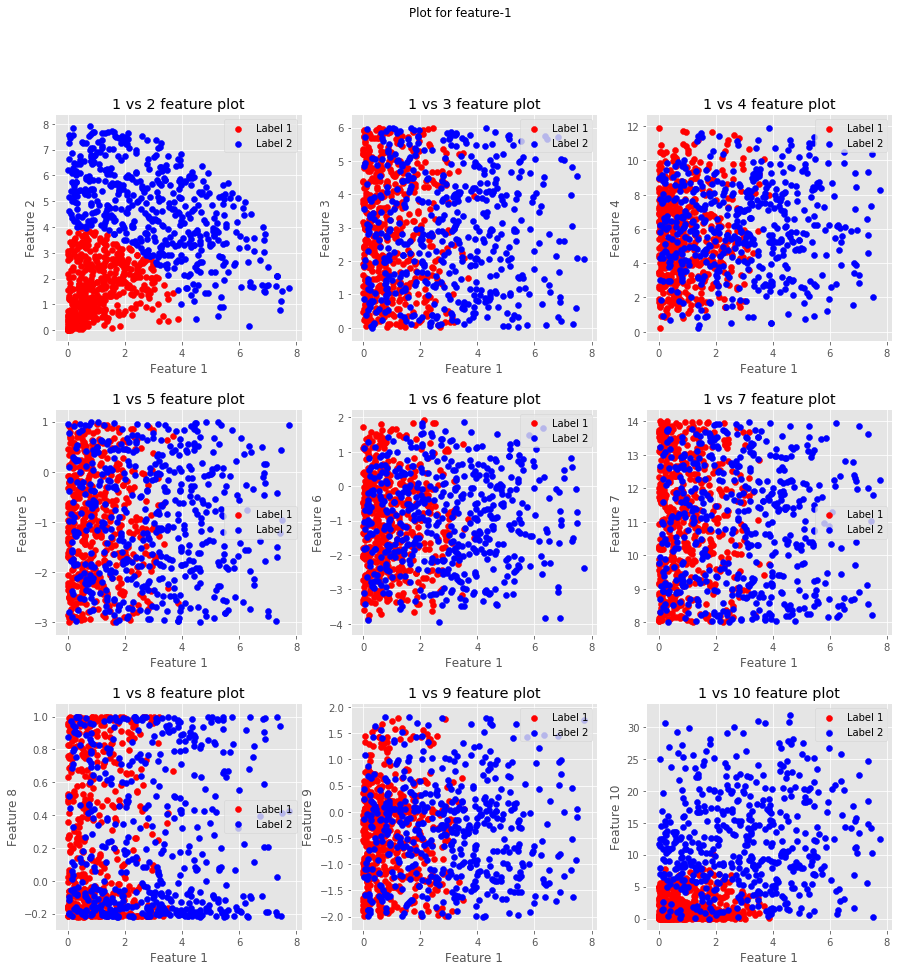

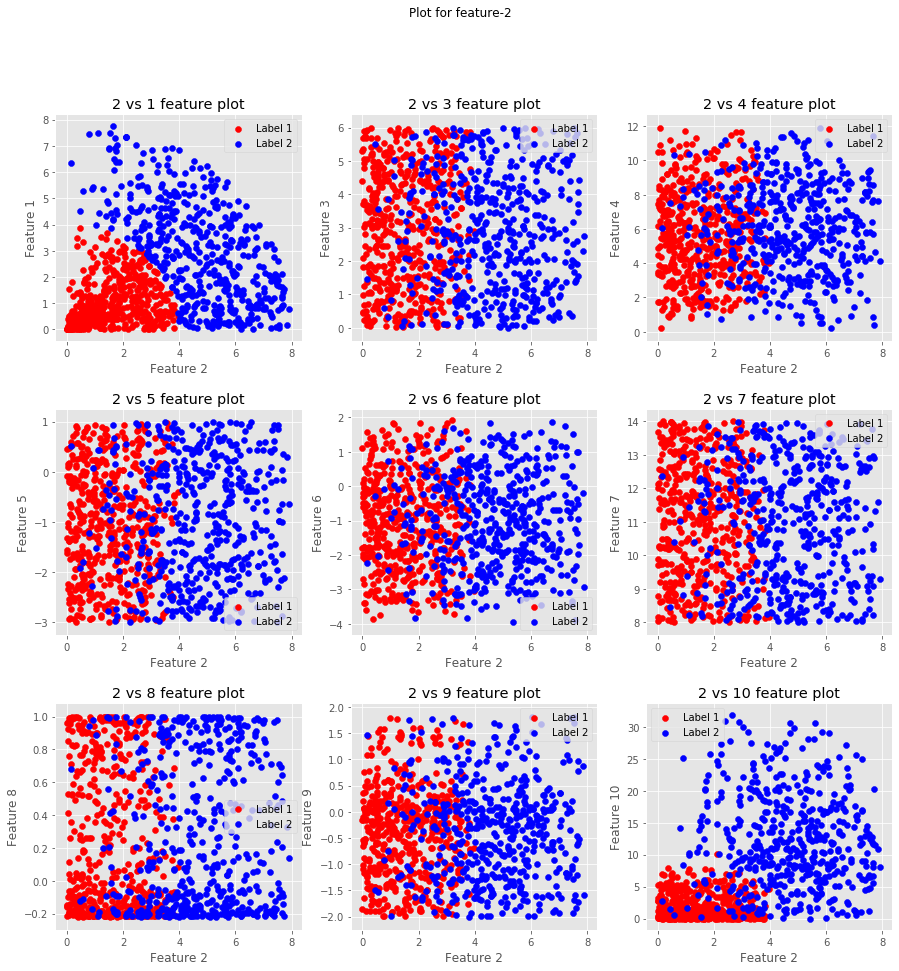

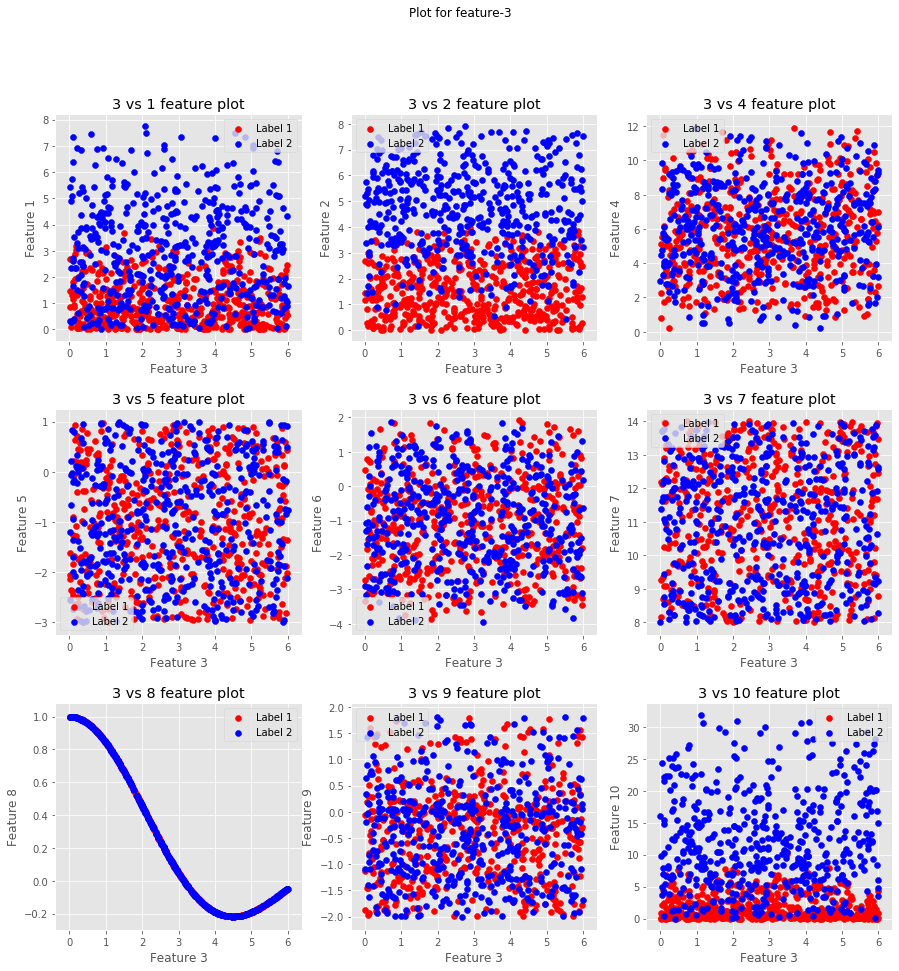

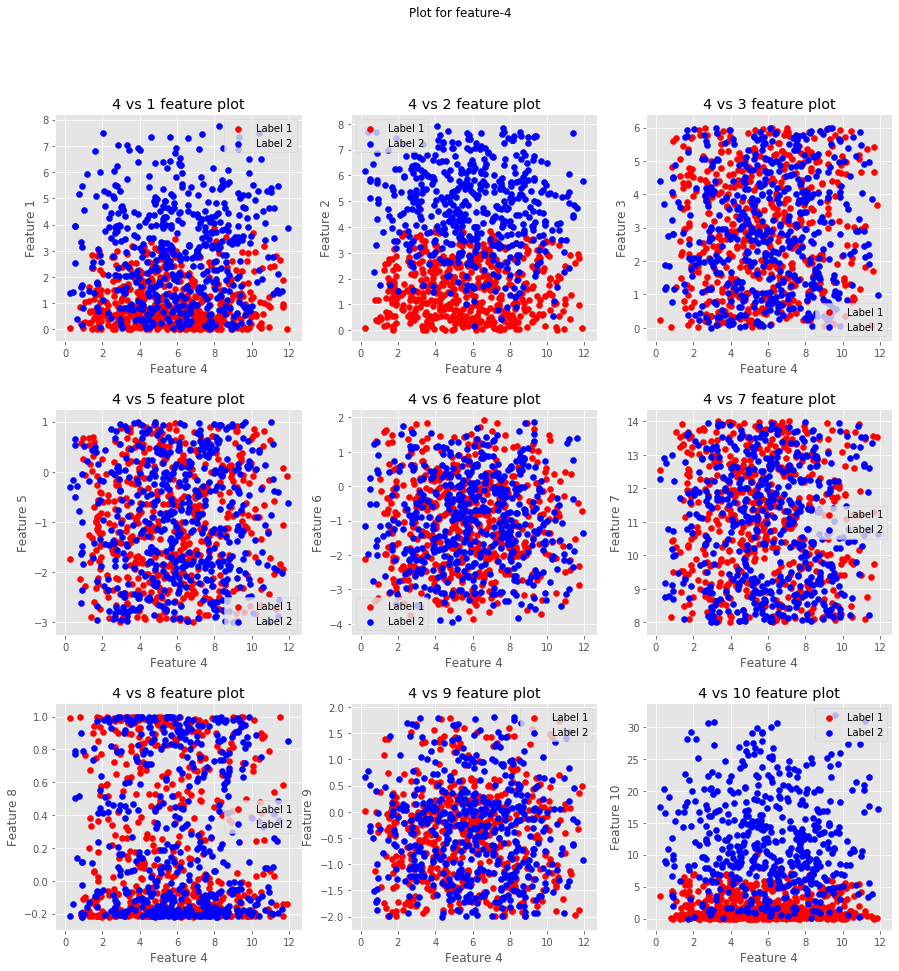

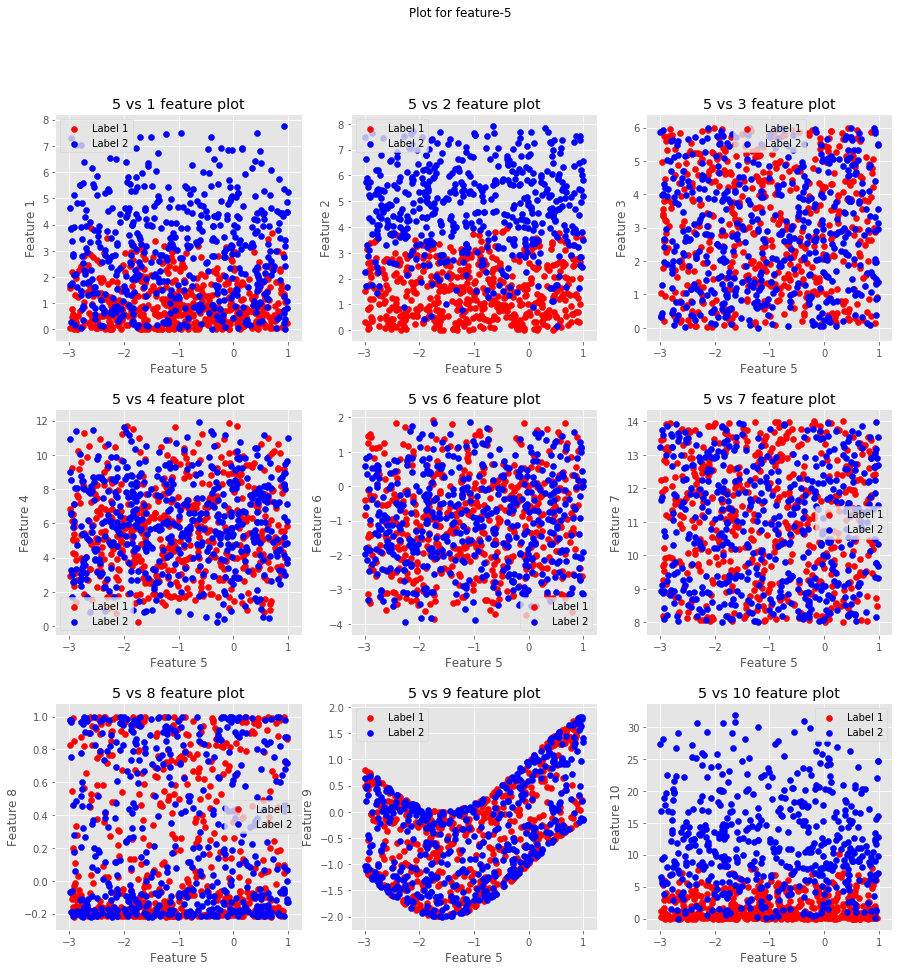

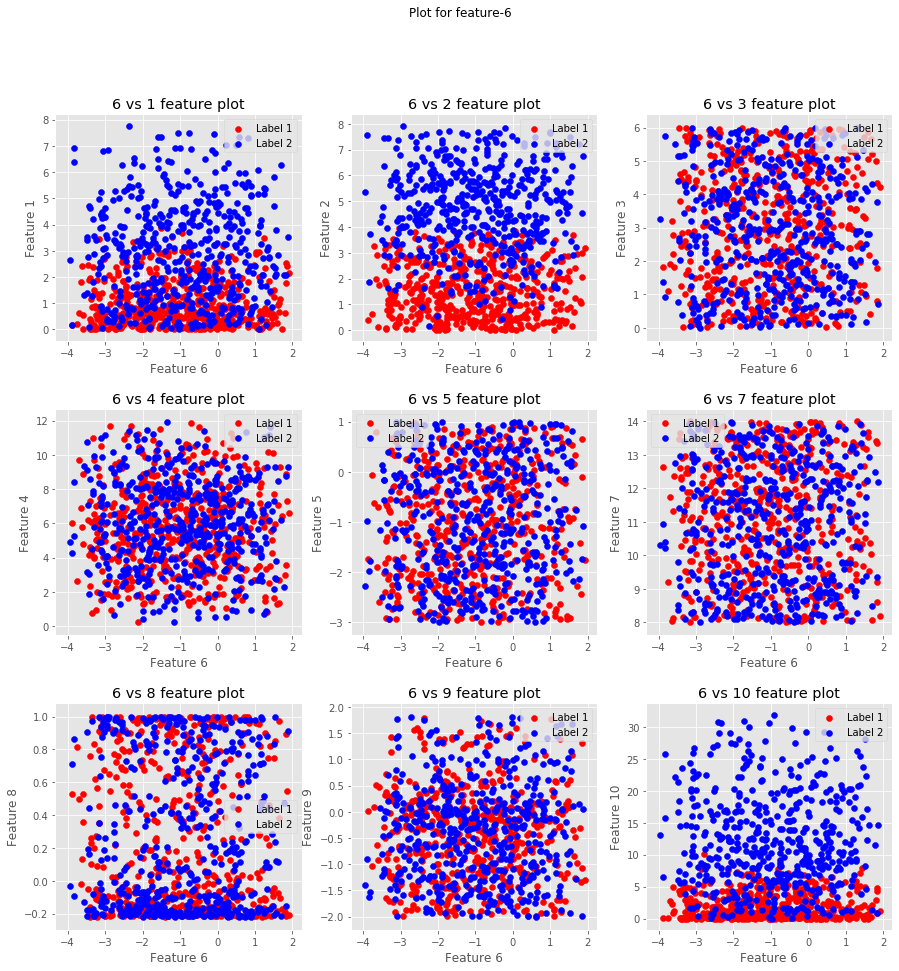

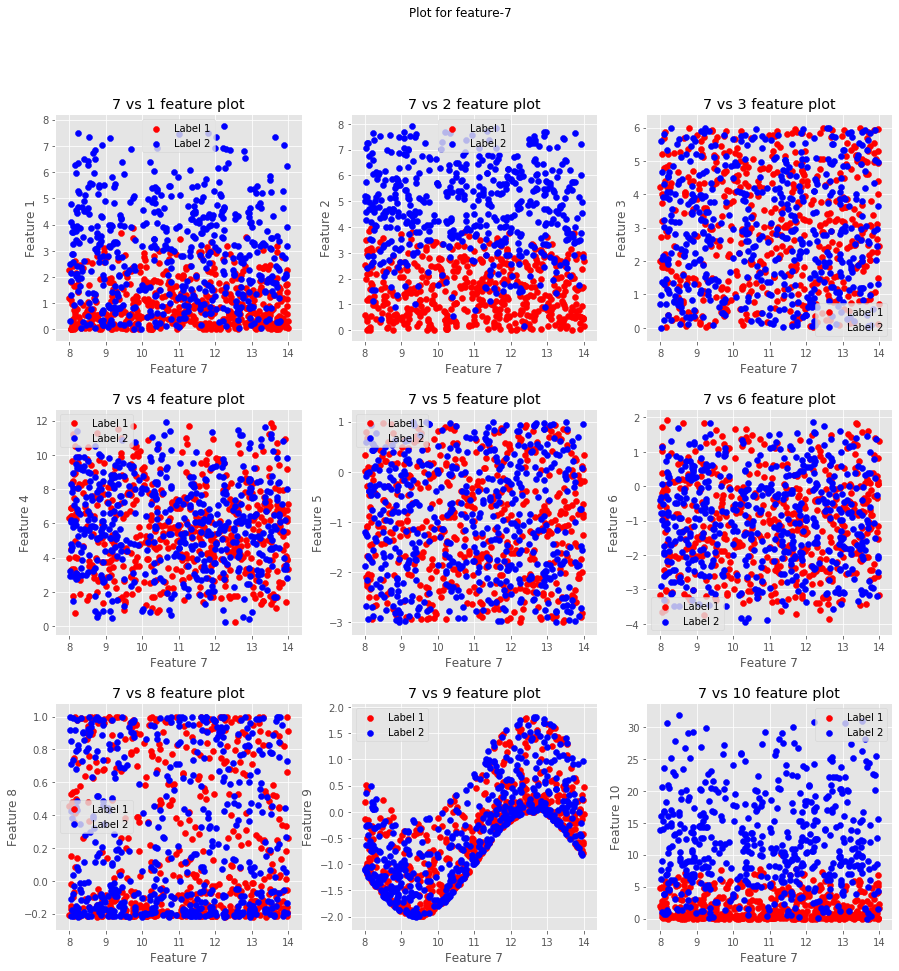

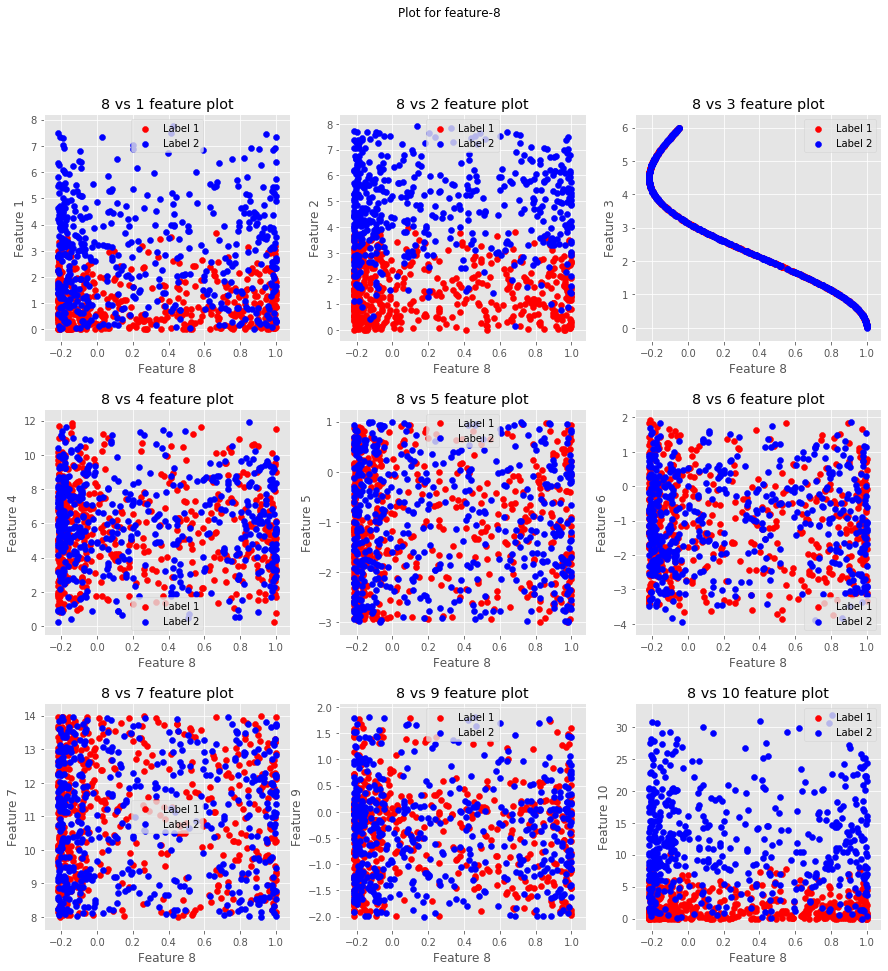

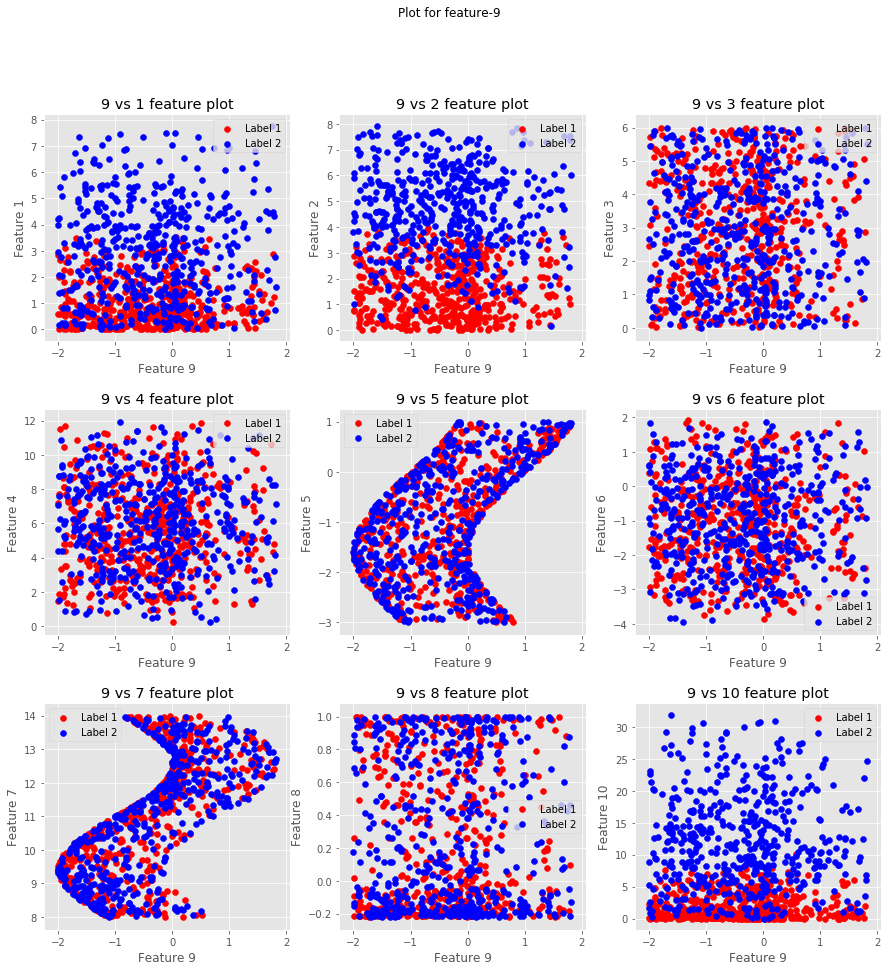

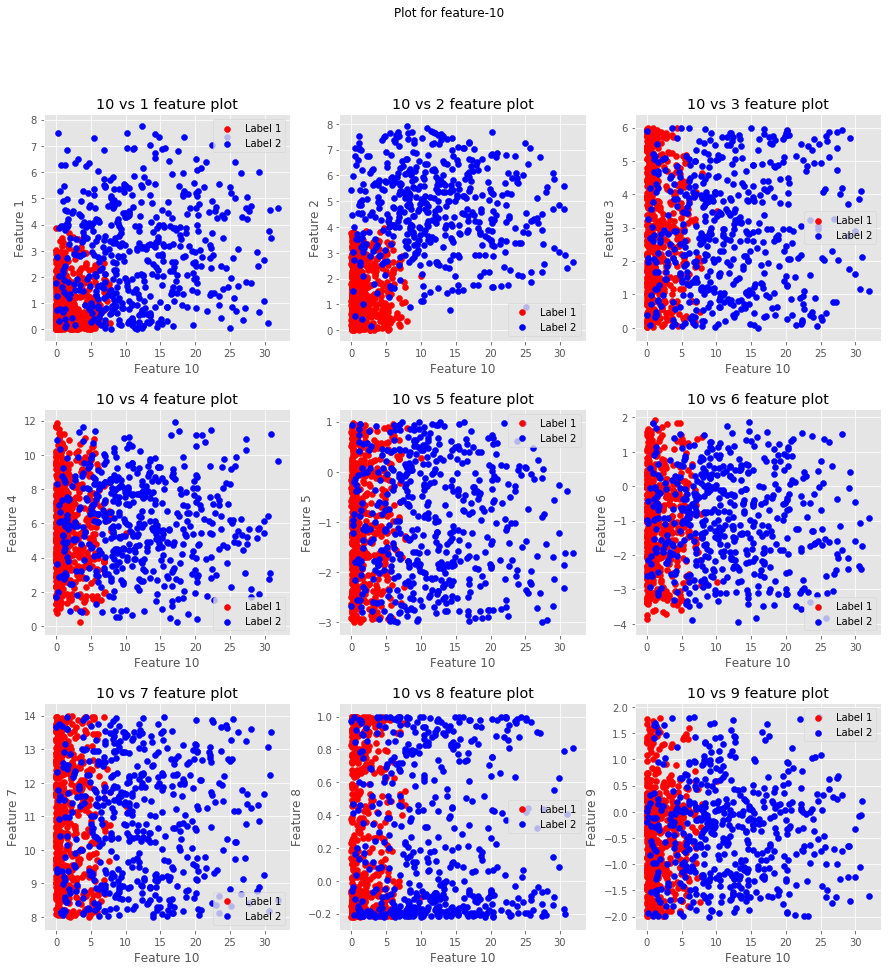

In [3]:
from matplotlib import pyplot as plt
from matplotlib import style

style.use('ggplot')

for i in range(1,column):
    #Creating subplots for each feature
    fig, axs = plt.subplots(3, 3,figsize=(15,15))
    plt.subplots_adjust(hspace=0.3)
    fig.suptitle("Plot for feature-%d" % i)
    x=0
    for j in range(1,column):
        x+=1
	#skip plotting if both features are same
        if(i==j):
            x-=1
            continue
        x-=1;

        f1_l1=label1[1::,i]
        f2_l1=label1[1::,j]
        axs[x//3,x%3].scatter(f1_l1,f2_l1,c="r",label="Label 1")
        
        f1_l2=label2[1::,i]
        f2_l2=label2[1::,j]
        axs[x//3,x%3].scatter(f1_l2,f2_l2,c="b",label="Label 2")

        axs[x//3,x%3].set_xlabel('Feature %d' % i)
        axs[x//3,x%3].set_ylabel('Feature %d' % j)
        axs[x//3,x%3].title.set_text("%d vs %d feature plot" % (i, j))
        axs[x//3,x%3].legend()
        x+=1
    plt.show();

## Features 1 and 2 can classify the two labels perfectly.

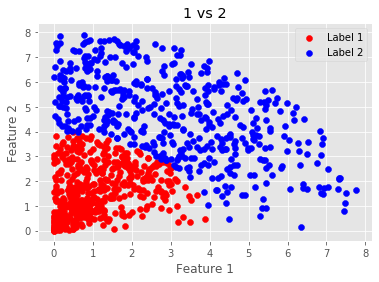

Features 1 and 2 can classify the two labels perfectly.


In [6]:
f1_l1=label1[1::,1]
f2_l1=label1[1::,2]
plt.scatter(f1_l1,f2_l1,c="r",label="Label 1")
        
f1_l2=label2[1::,1]
f2_l2=label2[1::,2]
plt.scatter(f1_l2,f2_l2,c="b",label="Label 2")

plt.title("1 vs 2")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
print("Features 1 and 2 can classify the two labels perfectly.")

# PCA

## Make dataframe (samples*features) for PCA

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing


without_header=f[1::,1:]
X=pd.DataFrame(without_header)

header=f[0,1:]
X.columns=header
print(X.shape)
print(X.head(5))

(999, 10)
    1.0       2.0       3.0       4.0       5.0       6.0        7.0   \
0  3.201  5.774701  3.429272  0.108732 -0.146594 -2.140013   8.025347   
1  1.066  0.519693  5.936320  0.194729 -1.031533  0.678119  12.408875   
2  1.395  6.184605  4.393927  0.236128 -0.306630 -1.152583  12.271188   
3  0.062  0.106774  0.227877  0.241525 -1.734883 -2.111483  12.531931   
4  1.416  7.687776  3.696551  0.416807 -0.167303 -1.977925  12.915153   

       8.0       9.0        10.0  
0 -0.082737 -0.316598   8.970595  
1 -0.057266  0.129536   6.406818  
2 -0.216143  0.654902  17.425628  
3  0.991368  0.012839   3.487370  
4 -0.142540  0.773266  20.234659  


## Standardization of data

In [15]:
from sklearn.preprocessing import StandardScaler
x = X.loc[:, header].values
x = StandardScaler().fit_transform(x) # normalizing the features
print(x.shape)

(999, 10)


In [22]:
pca=PCA(n_components=2)
pca.fit_transform(x)
final=pca.components_
print('PCA components- ',end='')
print(final)
print(np.argsort(final))

PCA components- [[ 0.10409042  0.11869575 -0.66772398 -0.03648085 -0.10590219 -0.00295952
  -0.17076494  0.66635621 -0.17927799  0.10646334]
 [ 0.37837136  0.40760218  0.2189692   0.11801913 -0.16164916  0.01214715
  -0.40233945 -0.21976515 -0.40413644  0.47858282]]
[[2 8 6 4 3 5 0 9 1 7]
 [8 6 7 4 5 3 2 0 1 9]]


### According to array, 8th and 10th features are most suitable.